© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
import numpy as np # type: ignore
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools # type: ignore

# Load synthetic data
data_dir = 'Synthetic_Data/'

hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic signal data
time = hdul[1].data  # Time Array
hdul.close()

cadence = 0.5  # cadence in seconds

# frequency and wavenumber ranges for filtering
f1=0.470
f2=0.530
k1=0.047
k2=0.250

# k-omega Analysis using WaLSAtools
power, wavenumber, frequencies, filtered_cube, spatial_fft_map, torus_map, spatial_fft_filtered_map, temporal_fft, temporal_filter, temporal_frequencies, spatial_frequencies = WaLSAtools(
    signal=signal_3d,
    time=time,
    method='k-omega',
    filtering=True,
    processing_maps=True,
    f1=f1,
    f2=f2,
    k1=k1,
    k2=k2,
)

Processing k-ω analysis for a 3D cube with format 'txy' and shape (200, 130, 130).

Input datacube size (t,x,y): (200, 130, 130)

Spatially, the important values are:
    2-pixel size = 2.00 (pixel)
    Nyquist wavenumber = 3.14 (pixel⁻¹)

Temporally, the important values are:
    2-element duration (Nyquist period) = 1.00 (s)
    Time series duration = 65.00 (s)
    Nyquist frequency = 1.00 (Hz)

Constructing a k-ω diagram of the input datacube..........

Start filtering (in k-ω space) ......

The preserved wavenumbers are [0.047, 0.250] (pixel⁻¹)
The preserved spatial sizes are [25.133, 133.685] (pixel)

The preserved frequencies are [0.470, 0.530] (Hz)
The preserved periods are [1, 2] (s)

Making a 3D Fourier transform of the input datacube ..........


In [2]:
# Save the results
# To be used in Figure 5 of the Nature Reviews Methods Primers article.

np.savez('Saved_Parameters/k_omega_analysis.npz', 
         power=power, 
         wavenumber=wavenumber, 
         frequencies=frequencies, 
         filtered_cube=filtered_cube, 
         f1=f1,
         f2=f2,
         k1=k1,
         k2=k2)

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/FigS4_k-omega_analysis.pdf'


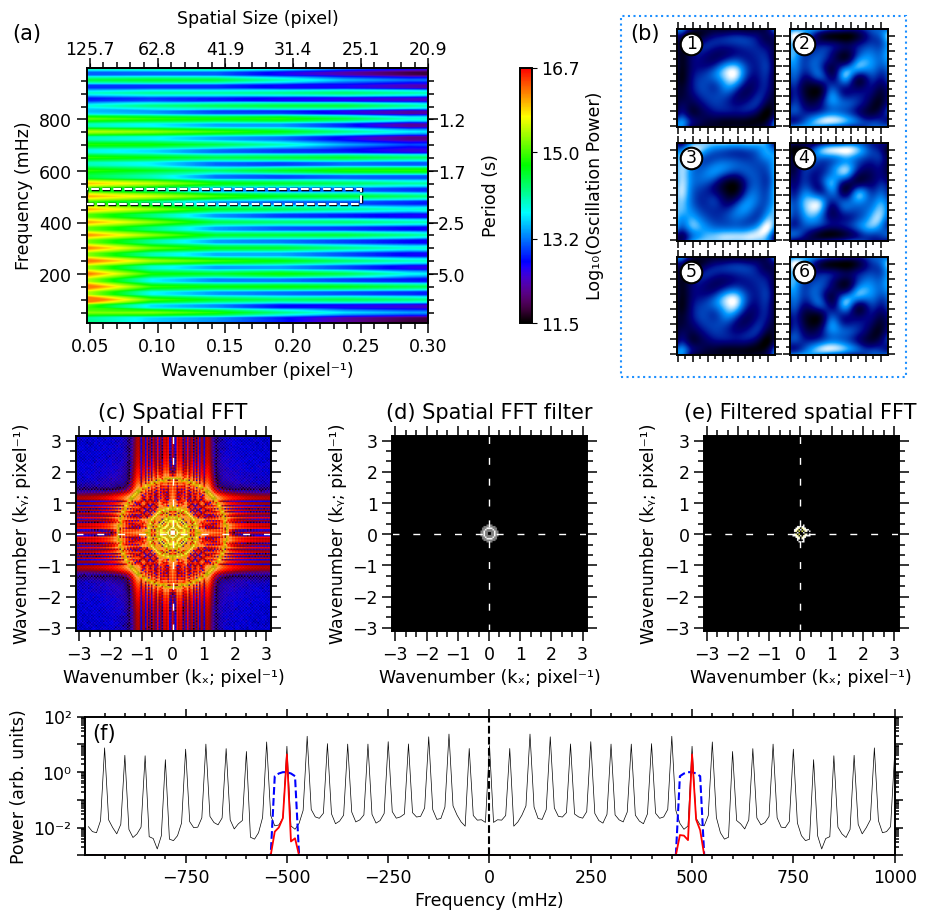

In [3]:
from matplotlib.colors import Normalize # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.ticker import LogLocator # type: ignore
import numpy as np # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.patches as patches # type: ignore
from matplotlib.colors import Normalize # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
from WaLSAtools import WaLSA_save_pdf, WaLSA_histo_opt, WaLSA_plot_k_omega # type: ignore

# Setting global parameters
plt.rcParams.update({
    'font.family': 'sans-serif',     # Use sans-serif fonts
    'font.sans-serif': 'DejaVu Sans',   # Set Helvetica as the default sans-serif font
    'font.size': 15,          # Global font size
    'axes.titlesize': 15,     # Title font size
    'axes.labelsize': 12.5,     # Axis label font size
    'xtick.labelsize': 12.5,    # X-axis tick label font size
    'ytick.labelsize': 12.5,    # Y-axis tick label font size
    'legend.fontsize': 12.5,    # Legend font size
    'figure.titlesize': 14,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
    'font.weight': 500,      # Make all fonts bold
    'axes.titleweight': 500, # Make title font bold
    'axes.labelweight': 500 # Make axis labels bold
})

plt.rc('axes', linewidth=1.4)
plt.rc('lines', linewidth=1.5)

# Set up the figure layout
fig = plt.figure(figsize=(9.11, 9.05))

#--------------------------------------------------------------------------
# k-omega plot
ax1d = fig.add_axes([0.09, 0.65, 0.56, 0.282])  # [left, bottom, width, height]
ax1d = WaLSA_plot_k_omega(
    kopower=power,
    kopower_xscale=wavenumber,
    kopower_yscale=frequencies*1000.,
    xlog=False, ylog=False, 
    xrange=(0, 0.3), figsize=(8, 4), cbartab=0.18,
    xtitle='Wavenumber (pixel⁻¹)', ytitle='Frequency (mHz)',
    colorbar_label='Log₁₀(Oscillation Power)', ax=ax1d,
    f1=0.472*1000, f2=0.530*1000,
    k1=0.047, k2=0.25
)

# Add label
fig.text(0.008, 0.963, '(a)', color='black')
#--------------------------------------------------------------------------
# Plot the fist 6 frames of the filtered cube in a 3x2 grid
fpositions = [
    [0.737, 0.867, 0.11, 0.108], [0.861, 0.867, 0.11, 0.108], # Top row
    [0.737, 0.741, 0.11, 0.108], [0.861, 0.741, 0.11, 0.108], # Middle row
    [0.737, 0.615, 0.11, 0.108], [0.861, 0.615, 0.11, 0.108]   # Bottom row
]

rgb_values = np.loadtxt('Color_Tables/idl_colormap_1.txt') / 255.0
idl_colormap_1 = ListedColormap(rgb_values)
custom_cmap = plt.get_cmap(idl_colormap_1)

for i in range(6):
    im = filtered_cube[i, :, :]
    ax = fig.add_axes(fpositions[i])  # Create each subplot in specified position
    ax.imshow(WaLSA_histo_opt(im), cmap=custom_cmap, aspect='equal', origin='lower')

    # Configure axis ticks and labels
    ax.tick_params(axis='both', which='both', direction='out', top=True, right=True)
    ax.set_xticks(np.arange(0, 130, 20))
    ax.set_yticks(np.arange(0, 130, 20))
    ax.tick_params(axis='both', which='major', length=5, width=1.1)  # Major ticks
    ax.tick_params(axis='both', which='minor', length=3, width=1.1)  # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Plot specific markers and labels
    ax.plot(18, 110, 'o', color='black', markersize=16)
    ax.plot(18, 110, 'o', color='white', markersize=13)
    ax.text(18, 103, str(i + 1), fontsize=12.5, ha='center', color='black', fontweight=500)

# Add a box around the six frames
rectangle = patches.Rectangle(
    (0.677, 0.591), 0.313, 0.3985, zorder=10,
    linewidth=1.5, edgecolor='DodgerBlue', facecolor='none', linestyle=':'
)
fig.add_artist(rectangle)

# Add label
fig.text(0.687, 0.963, '(b)', color='black')
#--------------------------------------------------------------------------
# Plot the processing steps: Spatial FFT, Spatial FFT filter, and Filtered spatial FFT
positions = [[0.078, 0.31, 0.215, 0.215], 
             [0.425, 0.31, 0.215, 0.215], 
             [0.767, 0.31, 0.215, 0.215]]
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm

# Load custom colormap
rgb_values = np.loadtxt('Color_Tables/idl_colormap_0.txt') / 255.0
cmap_torus_map = ListedColormap(rgb_values)
rgb_values = np.loadtxt('Color_Tables/idl_colormap_5.txt') / 255.0
cmap_spatial_fft = ListedColormap(rgb_values)

reversed_colors = cmap_spatial_fft(np.linspace(1, 0, 256))
cmap_reversed = ListedColormap(reversed_colors)

# Plot (c) Spatial FFT

# Extract data and convert to magnitude if it's complex
spatial_fft_map_data = spatial_fft_map['data']
if np.iscomplexobj(spatial_fft_map_data):  # Check if the data is complex
    spatial_fft_map_data = np.abs(spatial_fft_map_data)  # Use the magnitude for visualization

ax1 = fig.add_axes(positions[0])
im1 = ax1.imshow(
    spatial_fft_map_data, cmap=cmap_spatial_fft, aspect='equal',
    extent=[np.min(spatial_frequencies), np.max(spatial_frequencies),
            np.min(spatial_frequencies), np.max(spatial_frequencies)],
    norm=Normalize(vmin=np.nanmin(spatial_fft_map_data) + 1, vmax=np.nanmax(spatial_fft_map_data) - 1)
)
ax1.set_xlabel('Wavenumber (kₓ; pixel⁻¹)')
ax1.set_ylabel('Wavenumber (kᵧ; pixel⁻¹)')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(plt.MultipleLocator(3))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(3))
ax1.tick_params(axis='both', which='both', direction='out', top=True, right=True)
ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
ax1.yaxis.set_major_locator(plt.MultipleLocator(1))
ax1.tick_params(axis='both', which='major', length=7, width=1.1)
ax1.tick_params(axis='both', which='minor', length=4, width=1.1)
ax1.xaxis.set_minor_locator(AutoMinorLocator(3))
ax1.yaxis.set_minor_locator(AutoMinorLocator(3))

# Crosshair
ax1.axhline(0, color='white', linewidth=1, linestyle=(0, (5, 10)))
ax1.axvline(0, color='white', linewidth=1, linestyle=(0, (5, 10)))

ax1.set_xlim(np.min(spatial_frequencies), np.max(spatial_frequencies))
ax1.set_ylim(np.min(spatial_frequencies), np.max(spatial_frequencies))

# Annotation
ax1.text(0, 3.7, '(c) Spatial FFT', ha='center', color='black')

# Plot (d) Spatial FFT Filter

# Extract data and convert to magnitude if it's complex
torus_map_data = torus_map['data']
if np.iscomplexobj(torus_map_data):  # Check if the data is complex
    torus_map_data = np.abs(torus_map_data)  # Use the magnitude for visualization

ax2 = fig.add_axes(positions[1])
im2 = ax2.imshow(
    torus_map_data, cmap=cmap_torus_map, aspect='equal',
    extent=[np.min(spatial_frequencies), np.max(spatial_frequencies),
            np.min(spatial_frequencies), np.max(spatial_frequencies)],
    norm=Normalize(vmin=0, vmax=1)
)
ax2.set_xlabel('Wavenumber (kₓ; pixel⁻¹)')
ax2.set_ylabel('Wavenumber (kᵧ; pixel⁻¹)')
ax2.minorticks_on()
ax2.xaxis.set_minor_locator(plt.MultipleLocator(3))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(3))
ax2.tick_params(axis='both', which='both', direction='out', top=True, right=True)
ax2.xaxis.set_major_locator(plt.MultipleLocator(1))
ax2.yaxis.set_major_locator(plt.MultipleLocator(1))
ax2.tick_params(axis='both', which='major', length=7, width=1.1)
ax2.tick_params(axis='both', which='minor', length=4, width=1.1)
ax2.xaxis.set_minor_locator(AutoMinorLocator(3))
ax2.yaxis.set_minor_locator(AutoMinorLocator(3))

# Crosshair
ax2.axhline(0, color='white', linewidth=1, linestyle=(0, (5, 10)))
ax2.axvline(0, color='white', linewidth=1, linestyle=(0, (5, 10)))

ax2.set_xlim(np.min(spatial_frequencies), np.max(spatial_frequencies))
ax2.set_ylim(np.min(spatial_frequencies), np.max(spatial_frequencies))

# Annotation
ax2.text(0, 3.7, '(d) Spatial FFT filter', ha='center', color='black')

# Plot (e) Filtered Spatial FFT

# Extract data and convert to magnitude if it's complex
spatial_fft_filtered_map_data = spatial_fft_filtered_map['data']
if np.iscomplexobj(spatial_fft_filtered_map_data):  # Check if the data is complex
    spatial_fft_filtered_map_data = np.abs(spatial_fft_filtered_map_data)  # Use the magnitude for visualization

ax3 = fig.add_axes(positions[2])
im3 = ax3.imshow(
    spatial_fft_filtered_map_data, cmap=cmap_reversed, aspect='equal',
    extent=[np.min(spatial_frequencies), np.max(spatial_frequencies),
            np.min(spatial_frequencies), np.max(spatial_frequencies)],
    norm=Normalize(vmin=np.nanmin(spatial_fft_filtered_map_data) + 1, vmax=np.nanmax(spatial_fft_filtered_map_data) - 1)
)

ax3.set_xlabel('Wavenumber (kₓ; pixel⁻¹)')
ax3.set_ylabel('Wavenumber (kᵧ; pixel⁻¹)')
ax3.minorticks_on()
ax3.xaxis.set_minor_locator(plt.MultipleLocator(3))
ax3.yaxis.set_minor_locator(plt.MultipleLocator(3))
ax3.tick_params(axis='both', which='both', direction='out', top=True, right=True)
ax3.xaxis.set_major_locator(plt.MultipleLocator(1))
ax3.yaxis.set_major_locator(plt.MultipleLocator(1))
ax3.tick_params(axis='both', which='major', length=7, width=1.1)
ax3.tick_params(axis='both', which='minor', length=4, width=1.1)
ax3.xaxis.set_minor_locator(AutoMinorLocator(3))
ax3.yaxis.set_minor_locator(AutoMinorLocator(3))

# Crosshair
ax3.axhline(0, color='white', linewidth=1, linestyle=(0, (5, 10)))
ax3.axvline(0, color='white', linewidth=1, linestyle=(0, (5, 10)))

ax3.set_xlim(np.min(spatial_frequencies), np.max(spatial_frequencies))
ax3.set_ylim(np.min(spatial_frequencies), np.max(spatial_frequencies))

# Annotation
ax3.text(0, 3.7, '(e) Filtered spatial FFT', ha='center', color='black');

#--------------------------------------------------------------------------
# Plot the temporal FFT, temporal filter, and filtered FFT
ax4 = fig.add_axes([0.088, 0.062, 0.889, 0.153])  # Position for the plot

normalised_temporal_fft = temporal_fft/(3.3*10**6)

# Plot temporal FFT (main line with logarithmic y-axis)
ax4.plot(
    temporal_frequencies * 1000, np.abs(normalised_temporal_fft), 
    label='FFT Power', color='black', linewidth=0.5
)
ax4.set_yscale('log')  # Logarithmic y-axis

# Add vertical line at x=0
ax4.axvline(0, color='black', linewidth=1.5, linestyle='--')

# Plot temporal filter
temporal_fft_plot_ymin = 10**np.nanmin(np.log10(normalised_temporal_fft))
temporal_fft_plot_ymax = 10**np.nanmax(np.log10(normalised_temporal_fft))
temporal_fft_plot_ymin = 10**-3
temporal_fft_plot_ymax = 10**2

real_temporal_filter = np.real(temporal_filter)  # Extract the real part

ax4.plot(
    temporal_frequencies * 1000, 
    np.maximum(real_temporal_filter, temporal_fft_plot_ymin), 
    label='Temporal Filter', color='blue', linewidth=1.5, linestyle='--'
)

# Plot filtered FFT
ax4.plot(
    temporal_frequencies * 1000, 
    np.maximum(np.abs(np.real(normalised_temporal_fft) * real_temporal_filter), temporal_fft_plot_ymin),
    label='Filtered FFT', color='red', linewidth=1.3
)

# Configure ticks and labels
ax4.set_xlabel('Frequency (mHz)')
ax4.set_ylabel('Power (arb. units)')

ax4.tick_params(axis='both', which='both', direction='out', top=True, right=True)
ax4.tick_params(axis='both', which='major', length=6, width=1.1)
ax4.tick_params(axis='both', which='minor', length=3, width=1.1)
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))

# Set custom ticks
ax4.xaxis.set_major_locator(plt.MultipleLocator(250))
ax4.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax4.set_yticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2], minor=False)
ax4.set_yticklabels(['', '10⁻²', '', '10⁰', '', '10²'])
ax4.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10))

# Set plot limits
ax4.set_xlim([-999, 1000])
ax4.set_ylim([temporal_fft_plot_ymin, temporal_fft_plot_ymax])

# Add label
ax4.text(-980, 15, '(f)', color='black')

#--------------------------------------------------------------------------
# Adjust overall layout
# fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.0, hspace=0.0)

# Save the figure as a PDF
pdf_path = 'Figures/FigS4_k-omega_analysis.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()